# Aircraft Safety Analysis

## Overview

Our analysis aims to disinter meaningful insights from the dataset accessed from Kaggle as it relates to aviation accidents. This data contains the necessary information to develop our supporting arguments to form three concrete business recommendations: assessing the overall safety of planes, charting less treacherous skies, and focusing on commercial flights. With the cumulative knowledge we have fostered as budding data scientists, we aim to take you through cleaning, analyzing, and visualizing this aviation accident data. We hope the insight we provide can provide the basis for actionable results. 

## Business Understanding

Stakeholders: Shareholders and Customers.
The overall purpose of conducting this analysis is to provide the safest customer experience possible while streamlining our resources to maximize profits. To do this, we must determine the parameters necessary to assess these considerations. Questions to be considered are: What determining factors will be used to evaluate the safety of the planes we want to acquire? What travel routes are the safest, and what are more profitable, commercial or private airlines? These questions help to provide the framework for our analysis, which we will delve into in the sections below.

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Understanding

##### CRISP-DM steps taken from [this site](https://www.datascience-pm.com/crisp-dm-2/) 

### 1. Collect initial data: Acquire the necessary data and load it into your analysis tool

In [157]:
plane_df = pd.read_csv("Data/Aviation_data.csv")

/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_61862/2082444340.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  plane_df = pd.read_csv("Data/Aviation_data.csv")


### 2. Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.

In [158]:
plane_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [159]:
plane_df.shape

(90348, 31)

In [160]:
plane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [161]:
type(plane_df)

pandas.core.frame.DataFrame

### 3. Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.

In [162]:
# Maybe FAR.Description is helpful?
plane_df["FAR.Description"].value_counts()

FAR.Description
091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                     

In [163]:
plane_df["Make"].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [164]:
# Lots of Cessnas and Pipers. Inconsistent naming convention name. Gonna need cleaning if we use it.

In [165]:
# Let's visualize how many people were on the planes by creating a people count column and plotting it on a scatter.

In [166]:
plane_df.shape

(90348, 31)

In [167]:
plane_df['People.Count'] = (plane_df['Total.Fatal.Injuries'] + plane_df['Total.Serious.Injuries'] + 
                            plane_df['Total.Minor.Injuries'] + plane_df['Total.Uninjured'])
plane_df.shape

(90348, 32)

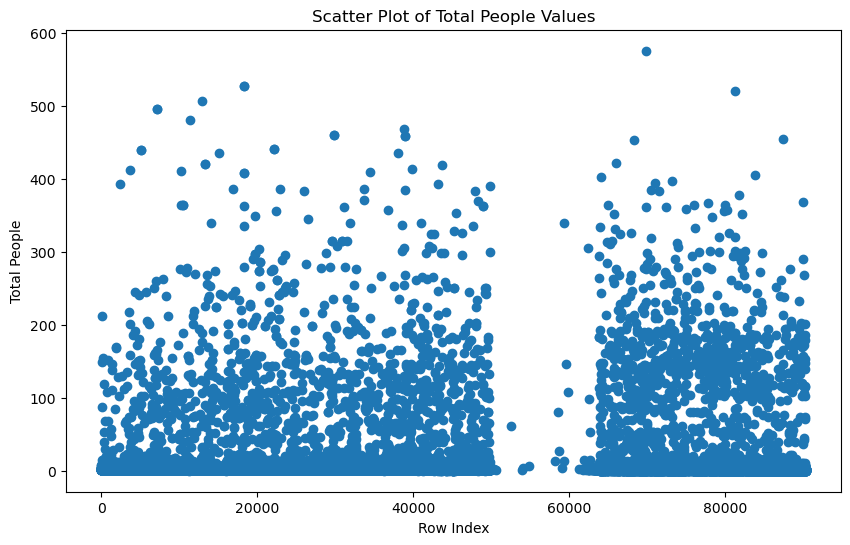

In [168]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=plane_df.index, y=plane_df['People.Count'])

# Adding labels and title
plt.xlabel('Row Index')
plt.ylabel('Total People')
plt.title('Scatter Plot of Total People Values')

# Saving the figure in the right folder
plt.savefig('Images/people_per_row_scatter1.png')

# Displaying the plot
plt.show()

In [169]:
# Ok, interesting... Lots of missing values for passenger count in the 5000s index
# BUT - scatter is very densely packed near the bottom of the Y-Axis
# A lot of rows with not a lot of total people the dataset

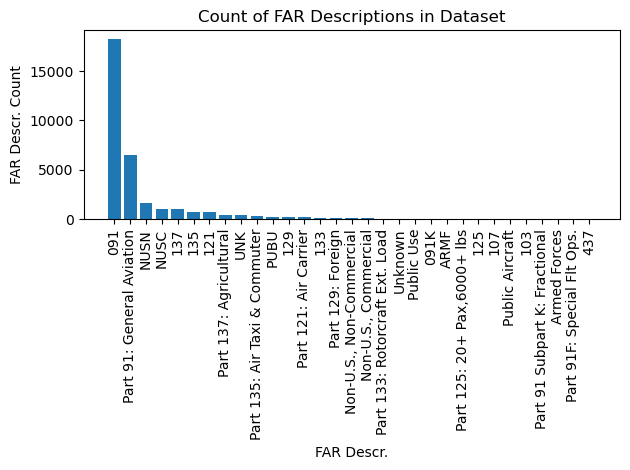

In [170]:
# Let's see what is up with the FAR.Description

FAR_plot_x = (dict(plane_df["FAR.Description"].value_counts())).keys()
FAR_plot_y = (dict(plane_df["FAR.Description"].value_counts())).values()

plt.bar(FAR_plot_x,FAR_plot_y)
plt.xticks(rotation=90)
plt.xlabel("FAR Descr.")
plt.ylabel("FAR Descr. Count")
plt.title("Count of FAR Descriptions in Dataset")
plt.tight_layout()

# Saving the figure in the right folder
plt.savefig('Images/FAR_count.png', pad_inches=1)

plt.show()

## Data Preparation

#### 1. Select data: Determine which data sets will be used and document reasons for inclusion/exclusion.
#### 2. Clean data: Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
#### 3. Construct data: Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.

In [171]:
# Lets drop some columns with a lot of null values or that we don't think will be a part of our final analysis
# Lets save it off into a new data frame
clean_plane_df = plane_df.drop(columns=['Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name',
       'Amateur.Built', 'Schedule', 'Air.carrier', 'Report.Status',
       'Publication.Date'])

In [172]:
# Lets take a peek at the new df
clean_plane_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,People.Count
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,NC6404,Stinson,...,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,N5069P,Piper,...,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,N5142R,Cessna,...,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,N1168J,Rockwell,...,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,NaN


In [173]:
clean_plane_df.shape

(90348, 22)

In [174]:
# We dropped some columns because of null values and irrelevance to business goals (or so we think...)
# Now we clean up the rows to make the data set more manageable

# Let's focus on the FAR.Description column since it seems relevant
# We did some research and Part 91 planes are not commercial airlines and not really relevant to our business analysis
# Let's drop them
clean_plane_df = clean_plane_df.dropna(subset=['FAR.Description']).query(
    '`FAR.Description` != ["Part 91: General Aviation", "091"]')

In [175]:
clean_plane_df.shape

(7316, 22)

In [176]:
# Wow, well we've trimmed the data set by quite a lot doing that

In [177]:
# Let's keep focusing on our FAR values
# Drop every row that does not have a FAR value
far_cols = ["135", "121", "Part 135", "129", "NUSC", "Part 121: Air Carrier",
            "Part 129: Foreign", "Non-U.S.,Commercial"]
clean_plane_df = clean_plane_df[clean_plane_df['FAR.Description'].isin(far_cols)]

In [178]:
# Let's check NaNs
clean_plane_df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     7
Injury.Severity            577
Aircraft.damage            947
Aircraft.Category          178
Registration.Number        116
Make                        30
Model                       34
Number.of.Engines         1122
Engine.Type               1344
FAR.Description              0
Purpose.of.flight         2698
Total.Fatal.Injuries       182
Total.Serious.Injuries     172
Total.Minor.Injuries       179
Total.Uninjured             58
Weather.Condition         1342
Broad.phase.of.flight     2823
People.Count               209
dtype: int64

In [179]:
clean_plane_df["Aircraft.damage"].value_counts()

Aircraft.damage
Substantial    1136
Minor           537
Destroyed       307
Unknown          22
Name: count, dtype: int64

In [180]:
# Drop unknowns from Aircraft damage
clean_plane_df = clean_plane_df[clean_plane_df['Aircraft.damage'] != 'Unknown']

In [181]:
# Sanity check
clean_plane_df["Aircraft.damage"].value_counts()

Aircraft.damage
Substantial    1136
Minor           537
Destroyed       307
Name: count, dtype: int64

In [182]:
# Drop Purpose of Flight because it is not relevant to goals
clean_plane_df = clean_plane_df.drop(columns=["Purpose.of.flight"])

In [183]:
# We want to be able to investigate how many people were on board at the time of the crash
# Lets fill null values in the relevant columns for future calculations
spec_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries"]
clean_plane_df[spec_cols] = clean_plane_df[spec_cols].fillna(0)

In [184]:
# Let's focus on Make since the plane recommendation is sure to be part of the business analysis
clean_plane_df["Make"].value_counts()

Make
BOEING                            832
CESSNA                            286
Boeing                            221
AIRBUS                            192
PIPER                             103
                                 ... 
AMERICAN EUROCOPTER LLC             1
AgustadWestland                     1
BOEING COMPANY, LONG BEACH DIV      1
Hawker Beechcraft Corporation       1
GARLICK                             1
Name: count, Length: 215, dtype: int64

In [185]:
# Let's clean the Makes formatting
clean_plane_df['Make'] = clean_plane_df['Make'].str.title()

In [186]:
# Sanity check
clean_plane_df['Make'].value_counts()

Make
Boeing                   1053
Cessna                    340
Airbus                    214
Piper                     118
Bell                      109
                         ... 
Ryan                        1
Md Helicopter Inc           1
Gulfstream Aerospace        1
Agusta Aerospace Corp       1
Saab-Scania Ab              1
Name: count, Length: 158, dtype: int64

In [187]:
# Next, let's only focus on the planes in our dataset
clean_plane_df = clean_plane_df[clean_plane_df['Aircraft.Category'] == 'Airplane']

In [188]:
# Ok, we have a kind of clean and trimmed down new data set based on our business analysis
# Save this off somewhere safe
file_path = "Data/final_clean_plane_df_1.csv"
clean_plane_df.to_csv("Data/final_clean_plane_df_1.csv", index=False)

In [189]:
# Read it back in under a new name
c_plane_df2 = pd.read_csv("Data/final_clean_plane_df_1.csv")

In [190]:
# Finish cleaning the passenger counts
c_plane_df2["Total.Uninjured"] = c_plane_df2["Total.Uninjured"].fillna(0)

In [191]:
# Let's focus on the Makes and standardizing them
boeing_variations = ['Boeing', 'Boeing Company', 'The Boeing Company', 'Boeing Of Canada/Dehav Div', 
                     'Boeing Company, Long Beach Div', '737', '777']

cessna_variations = ["Cessna", "Cessna Aircraft Company"]

airbus_variations = ["Airbus", "Airbus Industrie"]

piper_variations = ["Piper", "Piper Aircraft", "Piper Aircraft Corporation"]

embraer_variations = ["Embraer", "Embraer S A", "Embraer-Empresa Brasileira De", "Embraer Aircraft", "Embraer S.A."]

mcd_variations = ["Mcdonnell Douglas", "Douglas", "Mcdonnell Douglas Aircraft Co", "Mcdonnell-Douglas", 
                  "Mcdonald Douglas", "Mcdonnell Douglas Corporation"]

bombardier_variations = ["Bombardier Inc", "Bombardier", "Bombardier, Inc.", "Bombardier Learjet Corp."]

dehav_variations = ["Dehavilland", "De Havilland"]

britnor_variations = ["Britten-Norman", "Britten Norman"]

saab_variations = ["Saab-Scania Ab (Saab)", "Saab-Scania Ab", "Saab-Scania", "Saab"]

hawkbeech_variations = ["Hawker Beechcraft", "Hawker", "Hawker Beechcraft Corporation", "Hawker Beechcraft Corp.", 
                        "Beechcraft", "Hawker Siddeley", "Beech"]

gulfstream_variations = ["Gulfstream American", "Gulfstream Aerospace Lp", 
                         "Gulfstream Aerospace", "Gulfstream American Corp."]

cirrus_variations = ["Cirrus Design Corp", "Cirrus Design Corporation"]

canada_variations = ["Canadair", "Canadair Ltd"]

shortbro_variation = ["Short Bros", "Short Bros. & Harland", "Short Brothers"]

In [192]:
# Use the variations we set up
# A function would be faster and make more sense
c_plane_df2["Make"] = c_plane_df2["Make"].replace(boeing_variations, 'Boeing')
c_plane_df2["Make"] = c_plane_df2["Make"].replace(cessna_variations, 'Cessna')
c_plane_df2["Make"] = c_plane_df2["Make"].replace(airbus_variations, 'Airbus')
c_plane_df2["Make"] = c_plane_df2["Make"].replace(piper_variations, 'Piper')
c_plane_df2["Make"] = c_plane_df2["Make"].replace(embraer_variations, "Embraer")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(mcd_variations, "Mcdonnell Douglas")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(bombardier_variations, "Bombardier")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(dehav_variations, "Dehavilland")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(britnor_variations, "Britten-Norman")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(saab_variations, "Saab")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(hawkbeech_variations, "Hawker Beechcraft")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(gulfstream_variations, "Gulfstream")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(cirrus_variations, "Cirrus")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(canada_variations, "Canadair")
c_plane_df2["Make"] = c_plane_df2["Make"].replace(shortbro_variation, "Short Brothers")

In [193]:
# Now that we've standardized, let's drop the 'Make' values that are not frequent
# We do this because lack of data = uncertainty and risk
val_counts = c_plane_df2["Make"].value_counts()
vals_to_keep = val_counts[val_counts > 5].index
c_plane_df2 = c_plane_df2[c_plane_df2['Make'].isin(vals_to_keep)]

In [194]:
# We handled Makes, let's tackle 'Model'
c_plane_df2["Model"].value_counts()

Model
737           336
777            66
A320           62
747            58
767            50
             ... 
777 - 200       1
747-451         1
767-2B7         1
PA-34-220T      1
SA226TC         1
Name: count, Length: 721, dtype: int64

In [195]:
# Let's create a new column and combine Make and Model
# This felt like a good idea at the time since it would be easy to split at the colon
# It was a poor decision because it slowed further cleaning down
# But we'll get there
c_plane_df2["Make:Model"] = c_plane_df2["Make"] + ": " + c_plane_df2["Model"]

In [196]:
# Let's take a look at the new column
c_plane_df2.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Engine.Type,FAR.Description,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,People.Count,Make:Model
0,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,...,Turbo Fan,Part 129: Foreign,0.0,0.0,1.0,44.0,VMC,Climb,NaN,Mcdonnell Douglas: DC9
1,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",Incident,NaN,Airplane,N31031,Lockheed,...,Turbo Fan,Part 121: Air Carrier,0.0,0.0,0.0,149.0,UNK,Cruise,149.0,Lockheed: L-1011
2,20020917X02397,Accident,MIA82FA034,1982-01-19,"MIAMI, FL",Non-Fatal,Substantial,Airplane,HCBHS,Canadair,...,Turbo Prop,Part 129: Foreign,0.0,0.0,0.0,6.0,VMC,Landing,6.0,Canadair: CL-44D4
4,20020917X01909,Accident,DCA82AA013,1982-01-23,"BOSTON, MA",Fatal(2),Destroyed,Airplane,N113WA,Mcdonnell Douglas,...,Turbo Fan,Part 121: Air Carrier,2.0,4.0,24.0,182.0,IMC,Landing,212.0,Mcdonnell Douglas: DC-10-30
5,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",Non-Fatal,Minor,Airplane,N1814U,Mcdonnell Douglas,...,Turbo Fan,Part 121: Air Carrier,0.0,1.0,0.0,154.0,IMC,Takeoff,155.0,Mcdonnell Douglas: DC-10-10


In [197]:
# Drop the old columns that aren't needed
c_plane_df2 = c_plane_df2.drop(columns=["Make", "Model"])

In [198]:
# Can also drop Aircraft Category since we dropped the non-airplane rows
c_plane_df2 = c_plane_df2.drop(columns=["Aircraft.Category"])

In [199]:
c_plane_df2.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'People.Count', 'Make:Model'],
      dtype='object')

In [200]:
c_plane_df2.shape

(2350, 19)

In [201]:
# Dropping more irrelevant columns
selected_cols = ["Aircraft.damage", "Investigation.Type", "Broad.phase.of.flight", "FAR.Description", "Weather.Condition"]
c_plane_df2 = c_plane_df2.drop(columns=selected_cols)

In [202]:
# Save this off
c_plane_df2.to_csv("Data/final_clean_plane_df_2.csv", index=False)

In [203]:
# Read it back in
c_plane_df3 = pd.read_csv("Data/final_clean_plane_df_2.csv")

In [204]:
c_plane_df3["Make:Model"].value_counts()

Make:Model
Boeing: 737            336
Boeing: 777             66
Airbus: A320            62
Boeing: 747             58
Boeing: 767             50
                      ... 
Boeing: DHC-8-311        1
Boeing: 767-224          1
Saab: 340B               1
Embraer: EMB170          1
Swearingen: SA226TC      1
Name: count, Length: 745, dtype: int64

In [205]:
c_plane_df3.columns

Index(['Event.Id', 'Accident.Number', 'Event.Date', 'Location',
       'Injury.Severity', 'Registration.Number', 'Number.of.Engines',
       'Engine.Type', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'People.Count',
       'Make:Model'],
      dtype='object')

In [206]:
c_plane_df3.shape

(2350, 14)

In [207]:
c_plane_df3.head()

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Registration.Number,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,People.Count,Make:Model
0,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",Non-Fatal,CF-TLU,2.0,Turbo Fan,0.0,0.0,1.0,44.0,NaN,Mcdonnell Douglas: DC9
1,20020917X01897,CHI82IA026,1982-01-12,"CHICAGO, IL",Incident,N31031,3.0,Turbo Fan,0.0,0.0,0.0,149.0,149.0,Lockheed: L-1011
2,20020917X02397,MIA82FA034,1982-01-19,"MIAMI, FL",Non-Fatal,HCBHS,4.0,Turbo Prop,0.0,0.0,0.0,6.0,6.0,Canadair: CL-44D4
3,20020917X01909,DCA82AA013,1982-01-23,"BOSTON, MA",Fatal(2),N113WA,3.0,Turbo Fan,2.0,4.0,24.0,182.0,212.0,Mcdonnell Douglas: DC-10-30
4,20020917X01910,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",Non-Fatal,N1814U,3.0,Turbo Fan,0.0,1.0,0.0,154.0,155.0,Mcdonnell Douglas: DC-10-10


In [208]:
# Fix this column
c_plane_df3['People.Count'] = (c_plane_df3['Total.Fatal.Injuries'] + c_plane_df3['Total.Serious.Injuries']
                      + c_plane_df3['Total.Minor.Injuries'] + c_plane_df3['Total.Uninjured'])

In [209]:
c_plane_df3['People.Count'].describe()

count    2350.000000
mean       57.557447
std        89.116227
min         0.000000
25%         1.000000
50%         5.000000
75%       106.750000
max       588.000000
Name: People.Count, dtype: float64

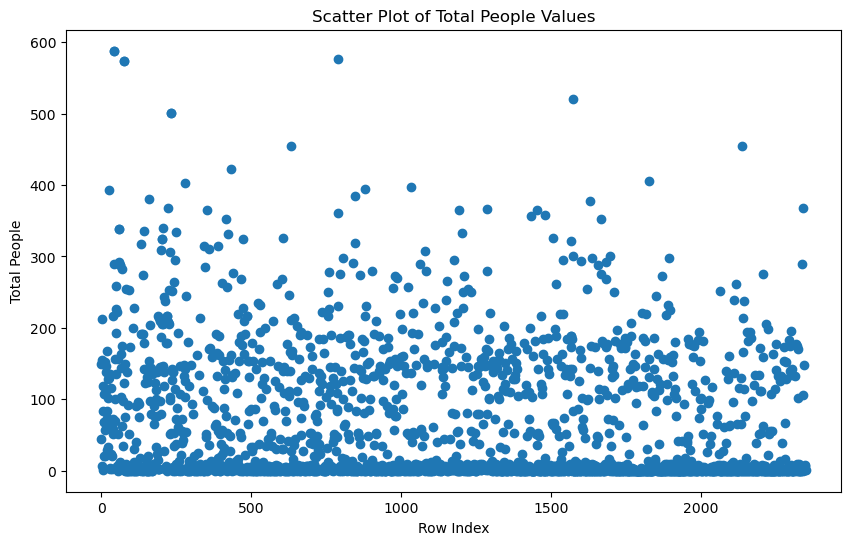

In [210]:
# Now we have our Passenger count sorted, lets retry the scatter plot from earlier
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=c_plane_df3.index, y=c_plane_df3['People.Count'])

# Adding labels and title
plt.xlabel('Row Index')
plt.ylabel('Total People')
plt.title('Scatter Plot of Total People Values')

# save the fig
plt.savefig('Images/people_per_row_scatter2.png')

# Displaying the plot
plt.show()

In [211]:
# A lot of clustering towards the X axis still
# Let's test a couple thresholds to see what we get
# Save the minimum threshhold to a temporary df

In [212]:
df_x1 = c_plane_df3[c_plane_df3['People.Count'] >= 20]
df_x1['People.Count'].describe()

count    904.000000
mean     145.330752
std       90.031901
min       20.000000
25%       79.000000
50%      137.000000
75%      184.250000
max      588.000000
Name: People.Count, dtype: float64

In [213]:
df_x2 = c_plane_df3[c_plane_df3['People.Count'] >= 40]
df_x2['People.Count'].describe()

count    828.000000
mean     155.892512
std       86.710441
min       40.000000
25%       99.000000
50%      143.000000
75%      189.000000
max      588.000000
Name: People.Count, dtype: float64

In [214]:
df_x3 = c_plane_df3[c_plane_df3['People.Count'] >= 30]
df_x3['People.Count'].describe()

count    870.000000
mean     150.064368
std       88.465192
min       30.000000
25%       86.250000
50%      140.000000
75%      186.000000
max      588.000000
Name: People.Count, dtype: float64

In [215]:
# Since the threshold decision would be essentially arbitrary, lets do some research
# The smallest regional commercial planes hold at least 30 souls
# Check out the new df before saving it back
df_x3.head()

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Registration.Number,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,People.Count,Make:Model
0,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",Non-Fatal,CF-TLU,2.0,Turbo Fan,0.0,0.0,1.0,44.0,45.0,Mcdonnell Douglas: DC9
1,20020917X01897,CHI82IA026,1982-01-12,"CHICAGO, IL",Incident,N31031,3.0,Turbo Fan,0.0,0.0,0.0,149.0,149.0,Lockheed: L-1011
3,20020917X01909,DCA82AA013,1982-01-23,"BOSTON, MA",Fatal(2),N113WA,3.0,Turbo Fan,2.0,4.0,24.0,182.0,212.0,Mcdonnell Douglas: DC-10-30
4,20020917X01910,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",Non-Fatal,N1814U,3.0,Turbo Fan,0.0,1.0,0.0,154.0,155.0,Mcdonnell Douglas: DC-10-10
5,20020917X02336,LAX82IA075,1982-02-15,"ONTARIO, CA",Incident,N73717,2.0,Turbo Jet,0.0,0.0,0.0,119.0,119.0,Boeing: B737-2H4


In [216]:
# Looks good
# Save it
c_plane_df3 = df_x3
c_plane_df3.to_csv("Data/final_clean_plane_df_3.csv")

#### 4. Integrate data: Create new data sets by combining data from multiple sources.
#### 5. Format data: Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

We want to look at the geography of these crashes to see if there is a trend. We can use tableau's spatial dimension to do this. First, we need to clean up the location column.

In [217]:
# Taking a peek at the Location column as a refresher
print(c_plane_df3[["Location"]].head(10))

            Location
0         BOSTON, MA
1        CHICAGO, IL
3         BOSTON, MA
4   PHILADELPHIA, PA
5        ONTARIO, CA
6      HARLINGEN, TX
8     LONG BEACH, CA
10    YOUNGSTOWN, OH
11        AUSTIN, TX
12         MIAMI, FL


In [218]:
# Unfortunately they aren't all this straightforward
print(c_plane_df3[["Location"]].tail(10))

                   Location
2302          Santa Ana, CA
2315                 Naha, 
2317             Bogota, OF
2321           Chiang Rai, 
2323         Pharisburg, OH
2325            Detroit, MI
2336        Los Angeles, CA
2339               Manila, 
2340  Komatsu, Ishikawa, OF
2344              Miami, FL


In [219]:
# Let's start by creating a dictionary of state abbreviations and their respective full names
state_names = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", 
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", 
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho", 
    "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas", 
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland", 
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", 
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", 
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York", 
    "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma", 
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina", 
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", 
    "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", 
    "WI": "Wisconsin", "WY": "Wyoming"
}

In [220]:
# Using ChatGPT to help me create a function to split the location column into two: 'City' and 'Region'
# Need to account for Washington, D.C. since it has a comma but is a single city
def split_location(location):
    if pd.isna(location):
        return [None, None]
    elif location == "Washington, DC":
        return ["Washington", "District of Columbia"]
    elif ',' in location:
        parts = [part.strip() for part in location.split(',', 1)]
        if parts[1] in state_names:
            parts[1] = state_names[parts[1]]  # Replace state abbreviation with full name
        return parts
    else:
        return [location, "Non-USA"]  # Assuming non-USA locations don't have a comma

# Applying the custom split function to the 'Location' column
c_plane_df3[['City', 'Region']] = c_plane_df3['Location'].apply(lambda x: split_location(x)).tolist()


In [221]:
c_plane_df3.head()

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Registration.Number,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,People.Count,Make:Model,City,Region
0,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",Non-Fatal,CF-TLU,2.0,Turbo Fan,0.0,0.0,1.0,44.0,45.0,Mcdonnell Douglas: DC9,BOSTON,Massachusetts
1,20020917X01897,CHI82IA026,1982-01-12,"CHICAGO, IL",Incident,N31031,3.0,Turbo Fan,0.0,0.0,0.0,149.0,149.0,Lockheed: L-1011,CHICAGO,Illinois
3,20020917X01909,DCA82AA013,1982-01-23,"BOSTON, MA",Fatal(2),N113WA,3.0,Turbo Fan,2.0,4.0,24.0,182.0,212.0,Mcdonnell Douglas: DC-10-30,BOSTON,Massachusetts
4,20020917X01910,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",Non-Fatal,N1814U,3.0,Turbo Fan,0.0,1.0,0.0,154.0,155.0,Mcdonnell Douglas: DC-10-10,PHILADELPHIA,Pennsylvania
5,20020917X02336,LAX82IA075,1982-02-15,"ONTARIO, CA",Incident,N73717,2.0,Turbo Jet,0.0,0.0,0.0,119.0,119.0,Boeing: B737-2H4,ONTARIO,California


In [222]:
# Using ChatGPT to fix city names
c_plane_df3['City'] = c_plane_df3['City'].apply(lambda x: x.title() if pd.notna(x) else x)
c_plane_df3.head()

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Registration.Number,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,People.Count,Make:Model,City,Region
0,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",Non-Fatal,CF-TLU,2.0,Turbo Fan,0.0,0.0,1.0,44.0,45.0,Mcdonnell Douglas: DC9,Boston,Massachusetts
1,20020917X01897,CHI82IA026,1982-01-12,"CHICAGO, IL",Incident,N31031,3.0,Turbo Fan,0.0,0.0,0.0,149.0,149.0,Lockheed: L-1011,Chicago,Illinois
3,20020917X01909,DCA82AA013,1982-01-23,"BOSTON, MA",Fatal(2),N113WA,3.0,Turbo Fan,2.0,4.0,24.0,182.0,212.0,Mcdonnell Douglas: DC-10-30,Boston,Massachusetts
4,20020917X01910,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",Non-Fatal,N1814U,3.0,Turbo Fan,0.0,1.0,0.0,154.0,155.0,Mcdonnell Douglas: DC-10-10,Philadelphia,Pennsylvania
5,20020917X02336,LAX82IA075,1982-02-15,"ONTARIO, CA",Incident,N73717,2.0,Turbo Jet,0.0,0.0,0.0,119.0,119.0,Boeing: B737-2H4,Ontario,California


In [223]:
# Save it!
c_plane_df3.to_csv("Data/final_clean_plane_df_4.csv", index=False)

In [224]:
# Read csv back in
c_plane_df4 = pd.read_csv("Data/final_clean_plane_df_4.csv")

In [225]:
# Creating the severity score
numerator = (c_plane_df4['Total.Uninjured'] + 3 * (c_plane_df4["Total.Minor.Injuries"]) 
             + 12 * (c_plane_df4["Total.Serious.Injuries"]) + 25 * (c_plane_df4["Total.Fatal.Injuries"]))
denominator = c_plane_df4['People.Count']
c_plane_df4['Severity_Score'] = (numerator / denominator) * 100

# Let's see the new column
c_plane_df4.head()

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Registration.Number,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,People.Count,Make:Model,City,Region,Severity_Score
0,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",Non-Fatal,CF-TLU,2.0,Turbo Fan,0.0,0.0,1.0,44.0,45.0,Mcdonnell Douglas: DC9,Boston,Massachusetts,104.444444
1,20020917X01897,CHI82IA026,1982-01-12,"CHICAGO, IL",Incident,N31031,3.0,Turbo Fan,0.0,0.0,0.0,149.0,149.0,Lockheed: L-1011,Chicago,Illinois,100.000000
2,20020917X01909,DCA82AA013,1982-01-23,"BOSTON, MA",Fatal(2),N113WA,3.0,Turbo Fan,2.0,4.0,24.0,182.0,212.0,Mcdonnell Douglas: DC-10-30,Boston,Massachusetts,166.037736
3,20020917X01910,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",Non-Fatal,N1814U,3.0,Turbo Fan,0.0,1.0,0.0,154.0,155.0,Mcdonnell Douglas: DC-10-10,Philadelphia,Pennsylvania,107.096774
4,20020917X02336,LAX82IA075,1982-02-15,"ONTARIO, CA",Incident,N73717,2.0,Turbo Jet,0.0,0.0,0.0,119.0,119.0,Boeing: B737-2H4,Ontario,California,100.000000


In [226]:
# Lets create an adjusted

In [227]:
# We need to standardize the model in the make:model column
## Should have done this before combining but better late than never
## Using a temporary column called 'extracted value' to help

c_plane_df4['extracted_value'] = c_plane_df4['Make:Model'].str.split(':', expand=True)[0]

In [228]:
# Running a groupby to isolate the makes

# mcdonnel douglas cleaning and creating subset
mcdonnell_douglas_filtered = c_plane_df4[c_plane_df4['Make:Model'].str.contains('Mcdonnell Douglas')]
mcdonnell_douglas_df = c_plane_df4[c_plane_df4['Make:Model'].str.contains('Mcdonnell Douglas')].groupby('Make:Model')
mcdonnell_douglas_filtered = c_plane_df4[c_plane_df4['Make:Model'].str.contains('Mcdonnell Douglas')]
mcdonnell_douglas_filtered['Make:Model'] = mcdonnell_douglas_filtered['Make:Model'].str.replace("-", "", regex=False).str.replace(" ", "")


/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_61862/2958646829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonnell_douglas_filtered['Make:Model'] = mcdonnell_douglas_filtered['Make:Model'].str.replace("-", "", regex=False).str.replace(" ", "")


In [229]:
# Creating a function for cleaning the specific model
def normalize_model(name):
    if 'DC983' in name or 'DC983(MD83)' in name or 'MD83' in name or 'MD88' in name or 'MD80' in name or 'MD83' in name or 'DC982' in name or 'MD81' in name or 'DC982' in name:
        return 'McdonnellDouglas:MD-80'
    elif 'DC1030' in name or 'DC1010' in name or 'DC10' in name or 'DC1030F' in name:
        return 'McdonnellDouglas:DC-10'
    elif 'DC9' in name:
        return 'McdonnellDouglas:DC-9'
    elif 'MD90' in name:
        return 'McdonnellDouglas:MD-90'
    elif 'MD11' in name:
        return 'McdonnellDouglas:MD-11'
    elif 'DC8' in name:
        return 'McdonnellDouglas:DC-8'
    else:
        return name

# Applying the fucntion
mcdonnell_douglas_filtered['Make:Model'] = mcdonnell_douglas_filtered['Make:Model'].apply(normalize_model)

/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_61862/2826563289.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonnell_douglas_filtered['Make:Model'] = mcdonnell_douglas_filtered['Make:Model'].apply(normalize_model)


In [230]:
# Cleaning Boeing and Airbus
Boeing_filtered = c_plane_df4[c_plane_df4['Make:Model'].str.contains('Boeing')]
Boeing_filtered['Make:Model'] = Boeing_filtered['Make:Model'].apply(lambda x: x.split(':')[0] if 'Boeing' in x else '') + \
                  Boeing_filtered['Make:Model'].str.extract('(\d+)')[0]

Airbus_filtered = c_plane_df4[c_plane_df4['Make:Model'].str.contains('Airbus')]
Airbus_filtered['Make:Model'] = Airbus_filtered['Make:Model'].apply(lambda x: x.split(':')[0] if 'Airbus' in x else '') + \
                  Airbus_filtered['Make:Model'].str.extract('(\d+)')[0]

/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_61862/2649586374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boeing_filtered['Make:Model'] = Boeing_filtered['Make:Model'].apply(lambda x: x.split(':')[0] if 'Boeing' in x else '') + \
/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_61862/2649586374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbus_filtered['Make:Model'] = Airbus_filtered['Make:Model'].apply(lambda x: x.split(':')[0] if 'Airbus' in x else '') + \


In [231]:
# Updating function for Embraer cleaning
Embraer_filtered = c_plane_df4[c_plane_df4['Make:Model'].str.contains('Embraer')]
def normalize_model2(name):
    if 'EMB145' in name or 'EMB-145LR' in name or 'EMB 145LR' in name or 'EMB-145' in name or 'Embraer: 145' in name:
        return 'Embraer-EMB145'
    elif 'ERJ170' in name or 'ERJ 170' in name:
        return 'Embraer-ERJ170'
    elif 'ERJ190' in name or '190' in name:
        return 'Embraer-ERJ190'
    elif 'EMB-135' in name or '135KL' in name:
        return 'Embraer-EMB135KL'
    elif 'EMB-170' in name or 'EMB170' in name:
        return 'Embraer-EMB170'
    elif 'E175' in name:
        return 'Embraer-E175'
    elif 'ERJ175' in name:
        return 'Embraer-ERJ175'
    else:
        return name
    
Embraer_filtered['Make:Model'] = Embraer_filtered['Make:Model'].apply(normalize_model2)


/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_61862/1463198286.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Embraer_filtered['Make:Model'] = Embraer_filtered['Make:Model'].apply(normalize_model2)


In [232]:
# Same with Bombardier
Bombardier_filtered = c_plane_df4[c_plane_df4['Make:Model'].str.contains('Bombardier')]
def normalize_model3(name):
    if '600' in name:
        return 'Bombardier-CL600'
    elif '402' in name:
        return 'Bombardier-DHC8-402'
    elif '202' in name:
        return 'Bombardier-DHC8-202'
    elif '311' in name:
        return 'Bombardier-DHC8-311'
    else:
        return name

# Applying the function to the 'Make:Model' column
Bombardier_filtered['Make:Model'] = Bombardier_filtered['Make:Model'].apply(normalize_model3)


/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_61862/50748815.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bombardier_filtered['Make:Model'] = Bombardier_filtered['Make:Model'].apply(normalize_model3)


In [233]:
# Last time with Lockheed
others_filtered = c_plane_df4[c_plane_df4['Make:Model'].str.contains('Lockheed|Fokker|Atr|Dehavilland|Short Brothers|Saab|Bae')]
def normalize_model4(name):
    if 'L-1011' in name:
        return 'Lockheed-L-1011'
    elif '4000' in name:
        return 'Fokker-F28-4000'
    elif 'DHC8' in name:
        return 'Dehavilland-DHC8'
    elif '100' in name:
        return 'Fokker-F-100'
    else:
        return name

others_filtered['Make:Model'] = others_filtered['Make:Model'].apply(normalize_model4)


/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_61862/2403191436.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_filtered['Make:Model'] = others_filtered['Make:Model'].apply(normalize_model4)


In [234]:
# Creating a new dataframe for the concatenated filtered list
# Saving it off for analysis
filt_c_plane_df4 = pd.concat([Boeing_filtered, Bombardier_filtered, mcdonnell_douglas_filtered, others_filtered, Airbus_filtered, Embraer_filtered], axis=0, ignore_index=True)
filt_c_plane_df4.to_csv("Data/final_clean_plane_make_model_df.csv", index=False)
filt_c_plane_df4['Make:Model'].value_counts()

Make:Model
Boeing737           268
Boeing777            61
Boeing767            57
Airbus320            51
Bombardier-CL600     48
                   ... 
Saab: 340B            1
Saab: SAAB 340B       1
Atr: ATR42            1
Saab: 2000            1
Embraer-ERJ175        1
Name: count, Length: 62, dtype: int64

In [235]:
# Sorting the new df for analysis
sorted_df = filt_c_plane_df4.sort_values(by='Severity_Score', ascending=True)
event_counts = sorted_df['Make:Model'].value_counts()

# Taking the mean of the severity score
normalized_severity_scores = sorted_df.groupby('Make:Model')['Severity_Score'].sum() / event_counts

# Lets take a look
normalized_severity_scores.head(20)

Make:Model
Airbus220      100.000000
Airbus300      108.370044
Airbus310     1766.388162
Airbus319      125.273421
Airbus320      156.955093
Airbus321      223.261220
Airbus330      303.407188
Airbus340      100.000000
Airbus380      100.000000
Atr: ATR42     128.947368
Atr: ATR72     100.000000
Bae: RJ85      100.000000
Boeing10       168.333333
Boeing707      111.111111
Boeing717      102.793381
Boeing727      238.333333
Boeing737      239.517955
Boeing744      100.000000
Boeing747      220.475643
Boeing757      152.527207
dtype: float64

## We wanted to investigate how the number of crashes is related to the popularity of a given plane
### Found the total number of delivieries through research
Here are the links to [Boeing](https://www.boeing.com/resources/boeingdotcom/company/annual-report/2022/Boeing-2022-Annual-Report.pdf), [Airbus](https://www.airbus.com/en/investors/financial-results-annual-reports/2022-airbus-annual-report), [Embraer](https://esg.embraer.com/global/en/annual-report). All this data is readily available online since these are public companies required to disclose financials

In [236]:
# Creating a total_deliveries dictionary
total_deliveries = {
    'Boeing737': 11550,
    'Boeing777': 1718,
    'Boeing767': 1288,
    'Boeing757': 1049,
    'Airbus320': 11134,
    'McdonnellDouglas:MD-80': 1191,
    'Bombardier-CL600': 1157,
    'Embraer-EMB145': 1231,
    'Airbus319': 1500,
    'Boeing747': 1574,
    'Airbus330': 1579,
    'Airbus321': 2965,
    'Embraer-ERJ170': 191,
    'McdonnellDouglas:DC-9': 2441,
    'McdonnellDouglas:DC-10': 386,
    'Boeing727': 1831,
    'Boeing787': 1040,
    'Embraer-ERJ190': 463,
    'Lockheed-L-1011': 250,
    'Bombardier-DHC8-402':1249,
    'Boeing717': 156,
    'Embraer-EMB135KL': 892,
    'McdonnellDouglas:MD-11': 200,
    'McdonnellDouglas:MD-90': 116,
    'Airbus220': 296,
    'Airbus310': 255,
    'Embraer-EMB170': 160,
    'Atr: ATR72': 1800,
    'Dehavilland-DHC8': 1232,
    'Airbus380': 251,
    'Fokker-F-100': 278,
    'Short Brothers: SD3-60': 165,
    'Boeing82': 1190,
    'McdonnellDouglas:DC-8': 556,
    'Boeing707': 1011,
    'Fokker-F28-4000': 241,
    'Boeing10': 400,
    'Airbus340': 377,
    'Embraer-ERJ175': 600,
    'Boeing88': 400,
    'Airbus300': 816,
    'Bombardier-DHC8-202': 500,
    'Boeing9': 500,
    'Boeing90': 450,
    'Boeing744': 1574,
    'Saab: 2000': 63,
}

In [237]:
# Creating new column and mapping total_deliveries dict based on cleaned make:model column
filt_c_plane_df4['Total Deliveries'] = filt_c_plane_df4['Make:Model'].map(total_deliveries)
c_plane_df4 = filt_c_plane_df4

In [238]:
# Lets create a new column with an adjusted severity score based on the volume of the Make:Model in service
c_plane_df4['Adjusted Severity_Score'] = (c_plane_df4['Severity_Score'] / c_plane_df4['Total Deliveries']) * 100
c_plane_df4.head()

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Registration.Number,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,People.Count,Make:Model,City,Region,Severity_Score,extracted_value,Total Deliveries,Adjusted Severity_Score
0,20020917X02336,LAX82IA075,1982-02-15,"ONTARIO, CA",Incident,N73717,2.0,Turbo Jet,0.0,0.0,0.0,119.0,119.0,Boeing737,Ontario,California,100.0,Boeing,11550.0,0.865801
1,20020917X02151,FTW82IA062,1982-02-19,"HARLINGEN, TX",Incident,XAMEJ,3.0,Turbo Jet,0.0,0.0,0.0,83.0,83.0,Boeing727,Harlingen,Texas,100.0,Boeing,1831.0,5.461496
2,20020917X01904,CHI82IA117,1982-04-09,"YOUNGSTOWN, OH",Incident,N7627U,3.0,Turbo Fan,0.0,0.0,0.0,108.0,108.0,Boeing727,Youngstown,Ohio,100.0,Boeing,1831.0,5.461496
3,20020917X02079,FTW82DA139,1982-04-18,"AUSTIN, TX",Non-Fatal,N32717,3.0,Turbo Fan,0.0,0.0,0.0,68.0,68.0,Boeing727,Austin,Texas,100.0,Boeing,1831.0,5.461496
4,20020917X04065,NYC82IA137,1982-07-05,"FLUSHING, NY",Incident,CGAAA,3.0,Turbo Fan,0.0,0.0,0.0,74.0,74.0,Boeing727,Flushing,New York,100.0,Boeing,1831.0,5.461496


### We want to grab the latitude and longitude for every location in the new dataframe with the planes we will investigate. But we dropped those columns unfortunately...
#### Good thing this data is easy to find! We used [this site](https://simplemaps.com/data/us-cities) to pull the basic csv and find the Lat and Long for each city

The original csv can be found in the Data folder in the github repo. We investigated ways to find the latitude and longitude through python. One option was using the google maps API. But in the interest of efficiency, we chose to perform a VLookup on excel. You can find the excel file in the data folder as well under 'uscities.csv'. Any location that wasn't able to be found was filled in manually using Geocoding API through the [Google Developers site](https://developers.google.com/maps/documentation/geocoding/overview). That updated csv can also be found in the data folder under 'clean_geodata.csv'.

Once we created a new csv of just the locations and their latitude and longitude, we added that back in to the main df on excel and saved it as a csv under 'big_plane_geo.csv'

In [239]:
clean_geo = pd.read_csv("Data/clean_geodata.csv", index_col=False)
clean_geo.head()

,City,Region,Latitude,Longitude
0,Boston,Massachusetts,42.3188,-71.0852
1,Chicago,Illinois,41.8375,-87.6866
2,Boston,Massachusetts,42.3188,-71.0852
3,Philadelphia,Pennsylvania,40.0077,-75.1339
4,Ontario,California,34.0393,-117.6064


In [240]:
big_plane_geo_df = pd.read_csv("Data/big_plane_geo.csv", index_col=False)
big_plane_geo_df.head()

,Event.Id,Accident.Number,Event.Date,Injury.Severity,Registration.Number,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make:Model,People.Count,City,Region,Latitude,Longitude
0,20170710X52551,NYC79AA106,9/17/79,Non-Fatal,CF-TLU,2.0,Turbo Fan,0,0,1,44,Mcdonnell Douglas: DC9,45,Boston,Massachusetts,42.3188,-71.0852
1,20020917X01897,CHI82IA026,1/12/82,Incident,N31031,3.0,Turbo Fan,0,0,0,149,Lockheed: L-1011,149,Chicago,Illinois,41.8375,-87.6866
2,20020917X01909,DCA82AA013,1/23/82,Fatal(2),N113WA,3.0,Turbo Fan,2,4,24,182,Mcdonnell Douglas: DC-10-30,212,Boston,Massachusetts,42.3188,-71.0852
3,20020917X01910,DCA82AA014,2/3/82,Non-Fatal,N1814U,3.0,Turbo Fan,0,1,0,154,Mcdonnell Douglas: DC-10-10,155,Philadelphia,Pennsylvania,40.0077,-75.1339
4,20020917X02336,LAX82IA075,2/15/82,Incident,N73717,2.0,Turbo Jet,0,0,0,119,Boeing: B737-2H4,119,Ontario,California,34.0393,-117.6064


In [241]:
# Lets bring the severity score, the adjusted severity score, and the geolocation data together
c_plane_df5 = big_plane_geo_df.merge(c_plane_df4, on="Event.Id")

In [242]:
# Lets see the new columns
c_plane_df5.columns

Index(['Event.Id', 'Accident.Number_x', 'Event.Date_x', 'Injury.Severity_x',
       'Registration.Number_x', 'Number.of.Engines_x', 'Engine.Type_x',
       'Total.Fatal.Injuries_x', 'Total.Serious.Injuries_x',
       'Total.Minor.Injuries_x', 'Total.Uninjured_x', 'Make:Model_x',
       'People.Count_x', 'City_x', 'Region_x', 'Latitude', 'Longitude',
       'Accident.Number_y', 'Event.Date_y', 'Location', 'Injury.Severity_y',
       'Registration.Number_y', 'Number.of.Engines_y', 'Engine.Type_y',
       'Total.Fatal.Injuries_y', 'Total.Serious.Injuries_y',
       'Total.Minor.Injuries_y', 'Total.Uninjured_y', 'People.Count_y',
       'Make:Model_y', 'City_y', 'Region_y', 'Severity_Score',
       'extracted_value', 'Total Deliveries', 'Adjusted Severity_Score'],
      dtype='object')

In [243]:
# Lets drop the duplicate columns and our temporary 'Extracted Value' column
c_plane_df6 = c_plane_df5.drop(columns=['Accident.Number_y', 'Event.Date_y', 'Location', 'Injury.Severity_y',
       'Registration.Number_y', 'Number.of.Engines_y', 'Engine.Type_y',
       'Total.Fatal.Injuries_y', 'Total.Serious.Injuries_y',
       'Total.Minor.Injuries_y', 'Total.Uninjured_y', 'People.Count_y',
       'Make:Model_x', 'City_y', 'Region_y',
       'extracted_value',])

In [244]:
c_plane_df6.columns

Index(['Event.Id', 'Accident.Number_x', 'Event.Date_x', 'Injury.Severity_x',
       'Registration.Number_x', 'Number.of.Engines_x', 'Engine.Type_x',
       'Total.Fatal.Injuries_x', 'Total.Serious.Injuries_x',
       'Total.Minor.Injuries_x', 'Total.Uninjured_x', 'People.Count_x',
       'City_x', 'Region_x', 'Latitude', 'Longitude', 'Make:Model_y',
       'Severity_Score', 'Total Deliveries', 'Adjusted Severity_Score'],
      dtype='object')

In [245]:
# Renaming the columns for readability
new_cols = {'Event.Date_x': 'Event.Date', 'Injury.Severity_x': 'Injury.Severity',
            'Registration.Number_x': 'Registration.Number', 'Accident.Number_x': 'Accident.Number',
            'Number.of.Engines_x': 'Number.of.Engines', 'Engine.Type_x': 'Engine.Type',
            'Total.Fatal.Injuries_x': 'Total.Fatal.Injuries', 'Total.Serious.Injuries_x': 'Total.Serious.Injuries',
            'Total.Minor.Injuries_x': 'Total.Minor.Injuries', 'City_x': 'City', 'Region_x': 'Region',
            'Total.Uninjured_x': 'Total.Uninjured', 'Make:Model_y': 'Make:Model', 'People.Count_x': 'People.Count'
           }

In [246]:
c_plane_df6.rename(columns=new_cols, inplace=True)

In [247]:
c_plane_df6.head()

,Event.Id,Accident.Number,Event.Date,Injury.Severity,Registration.Number,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,People.Count,City,Region,Latitude,Longitude,Make:Model,Severity_Score,Total Deliveries,Adjusted Severity_Score
0,20170710X52551,NYC79AA106,9/17/79,Non-Fatal,CF-TLU,2.0,Turbo Fan,0,0,1,44,45,Boston,Massachusetts,42.3188,-71.0852,McdonnellDouglas:DC-9,104.444444,2441.0,4.278756
1,20020917X01897,CHI82IA026,1/12/82,Incident,N31031,3.0,Turbo Fan,0,0,0,149,149,Chicago,Illinois,41.8375,-87.6866,Lockheed-L-1011,100.000000,250.0,40.000000
2,20020917X01909,DCA82AA013,1/23/82,Fatal(2),N113WA,3.0,Turbo Fan,2,4,24,182,212,Boston,Massachusetts,42.3188,-71.0852,McdonnellDouglas:DC-10,166.037736,386.0,43.014957
3,20020917X01910,DCA82AA014,2/3/82,Non-Fatal,N1814U,3.0,Turbo Fan,0,1,0,154,155,Philadelphia,Pennsylvania,40.0077,-75.1339,McdonnellDouglas:DC-10,107.096774,386.0,27.745278
4,20020917X02336,LAX82IA075,2/15/82,Incident,N73717,2.0,Turbo Jet,0,0,0,119,119,Ontario,California,34.0393,-117.6064,Boeing737,100.000000,11550.0,0.865801


In [248]:
c_plane_df6.to_csv("Data/final_analysis_df.csv")

In [249]:
filtered_c_plane_df6 = c_plane_df6[c_plane_df6['People.Count'] < 50]
filtered_c_plane_df6

,Event.Id,Accident.Number,Event.Date,Injury.Severity,Registration.Number,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,People.Count,City,Region,Latitude,Longitude,Make:Model,Severity_Score,Total Deliveries,Adjusted Severity_Score
0,20170710X52551,NYC79AA106,9/17/79,Non-Fatal,CF-TLU,2.0,Turbo Fan,0,0,1,44,45,Boston,Massachusetts,42.318800,-71.085200,McdonnellDouglas:DC-9,104.444444,2441.0,4.278756
76,20001211X11543,DCA99WA027,12/28/98,Incident,NaN,NaN,Unknown,0,0,0,40,40,Curitba,Brazil,-25.437238,-49.269973,Embraer-EMB145,100.000000,1231.0,8.123477
178,20080222X00229,SEA08IA080,2/13/08,Non-Fatal,N651BR,2.0,Turbo Fan,0,0,0,43,43,Hilo,Hawaii,19.688300,-155.086300,Bombardier-CL600,100.000000,1157.0,8.643042
200,20080813X01238,DCA08WA080,7/14/08,Non-Fatal,5N-BIG,NaN,NaN,0,1,0,46,47,Port Harcourt,Nigeria,38.627003,-90.199404,Boeing737,123.404255,11550.0,1.068435
232,20090213X13613,DCA09MA027,2/13/09,Fatal,N200WQ,2.0,Turbo Prop,49,0,0,0,49,Clarence Center,New York,43.008500,-78.630900,Bombardier-DHC8-402,2500.000000,1249.0,200.160128
247,20090522X80352,WPR09LA255,5/21/09,Non-Fatal,N843AE,2.0,NaN,0,0,0,47,47,Los Angeles,California,34.114100,-118.406800,Embraer-EMB135KL,100.000000,892.0,11.210762
277,20091228X15816,CEN10IA084,12/26/09,Non-Fatal,N494AE,2.0,Turbo Prop,0,0,0,45,45,Dallas,Texas,32.793500,-96.766700,Atr: ATR72,100.000000,1800.0,5.555556
280,20100114X11754,ENG10IA010,1/12/10,Non-Fatal,N434AT,2.0,Turbo Prop,0,0,0,48,48,St. Croix,US Virgin Islands,17.724597,-64.834799,Atr: ATR72,100.000000,1800.0,5.555556
288,20100315X12046,CEN10IA157,3/13/10,Non-Fatal,N16561,2.0,Turbo Fan,0,0,0,45,45,Chicago,Illinois,41.837500,-87.686600,Embraer-EMB145,100.000000,1231.0,8.123477
298,20100511X03836,DCA10WA057,5/5/10,Non-Fatal,HK4536,2.0,NaN,0,0,0,41,41,Mitu,Colombia,1.252174,-70.233618,Embraer-EMB145,100.000000,1231.0,8.123477


## Analysis and Results

In [250]:
# Creating a new df for adjusted severity score analysis
# ranking adj sev score

# creating new df that is grouped by make:model for clean view of adj severity scores
grouped_df = c_plane_df4.groupby('Make:Model').agg({
    'Adjusted Severity_Score': 'mean',
    'Total Deliveries': 'mean',
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Make:Model': 'size'
})

In [251]:
ranking = grouped_df.sort_values(by='Adjusted Severity_Score', ascending=True)
df = ranking.head(10)

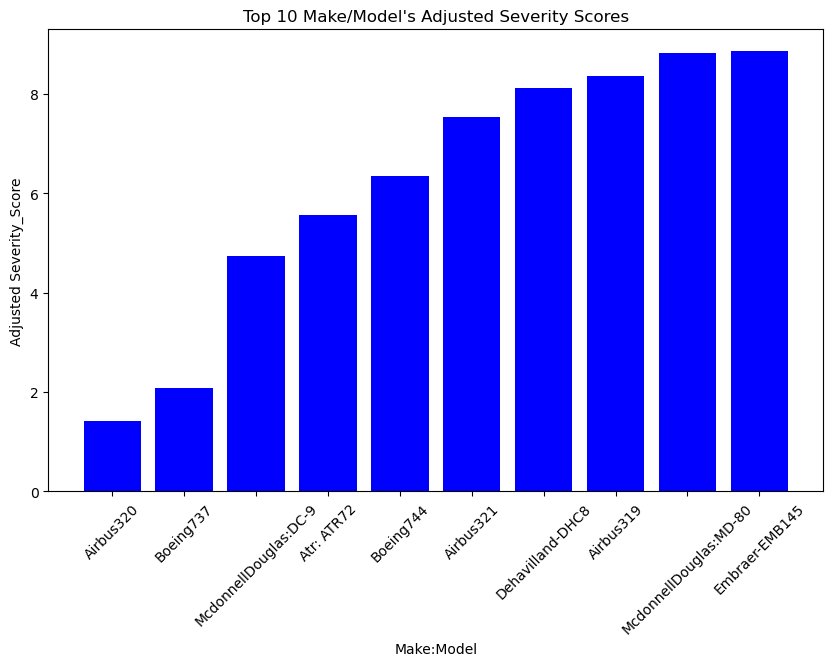

In [252]:
plt.figure(figsize=(10,6))
plt.bar(df.index, df['Adjusted Severity_Score'], color='blue')
plt.title("Top 10 Make/Model's Adjusted Severity Scores")

plt.xlabel('Make:Model')
plt.ylabel('Adjusted Severity_Score')
plt.xticks(rotation=45)
plt.savefig('Images/make:model_ranking.png')
plt.show()

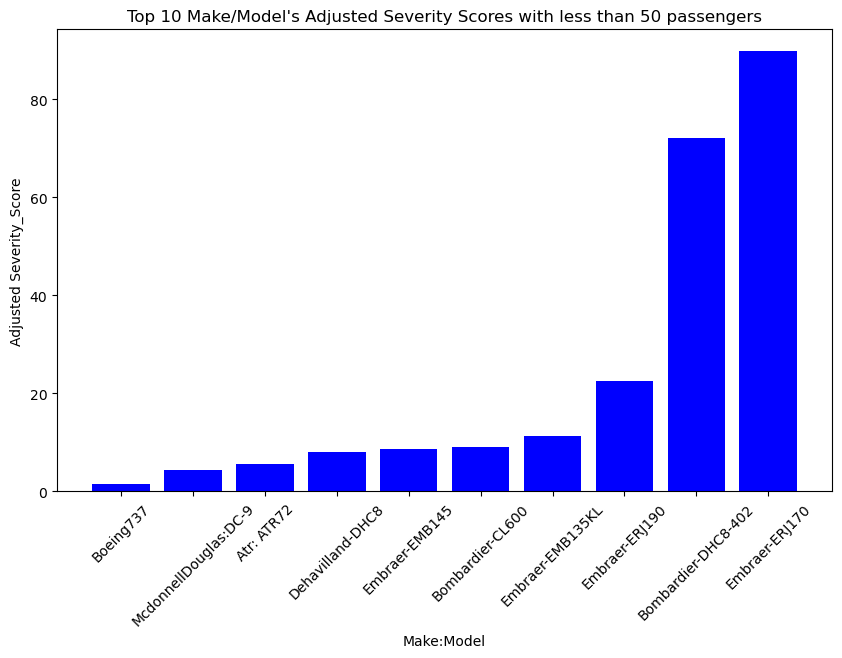

In [253]:
grouped_df_1 = filtered_c_plane_df6.groupby('Make:Model').agg({
    'Adjusted Severity_Score': 'mean',
    'Total Deliveries': 'mean',
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Make:Model': 'size'
})

ranking_1 = grouped_df_1.sort_values(by='Adjusted Severity_Score', ascending=True)
df_1 = ranking_1.head(10)

plt.figure(figsize=(10,6))
plt.bar(df_1.index, df_1['Adjusted Severity_Score'], color='blue')
plt.title("Top 10 Make/Model's Adjusted Severity Scores with less than 50 passengers")

plt.xlabel('Make:Model')
plt.ylabel('Adjusted Severity_Score')
plt.xticks(rotation=45)
plt.savefig('Images/make:model_ranking-smallplanes.png')
plt.show()

### Business Recommendation 1

Buy the Airbus 320 for International Travel

### Business Recommendation 2

Buy ATR 72 plane for Regional travel

### Business Recommendation 3

Avoiding danger zones as much as possible

## Conclusion and Next Steps

Our analysis aims to find the safest make/model using the National Transportation Safety Board data and determine which regions will be the least risky for routes. After some data cleaning, with the help of a formula that we generated and some external resources, we were able to give out the recommendations: Airbus 320 is the safest model for international travel (targeting Japan, Europe, and South America especially) and ATR 72 is the best option (safety wise) for regional trips (targeting coastal areas in the US). The following steps will be finding and comparing the prices and maintenance costs of the models that we suggested and doing more marketing research on the regions that we recommended; by doing that, we should be able to come up with a better idea of how we can make this new business profitable at the lowest risk.